# Task 2.1 - Data Cleaning

In the previous task, we've studied issues and the potential adjustments on data quality. Now it's time to clean the datasets to allow our insights analysis.  
This phase is crucial for a Data Analyst/Data Scientist job to prevent the problem of [GIGO](https://en.wikipedia.org/wiki/Garbage_in,_garbage_out) (garbage in, garbage out).

## Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the Data

In [35]:
transactions = pd.read_excel('../Data/KPMG_VI_New_raw_data_update_final.xlsx', header=1, sheet_name='Transactions')
customer_demographic = pd.read_excel('../Data/KPMG_VI_New_raw_data_update_final.xlsx', header=1, sheet_name='CustomerDemographic')
customer_address = pd.read_excel('../Data/KPMG_VI_New_raw_data_update_final.xlsx', header=1, sheet_name='CustomerAddress')

## Clean the datasets

### Transactions dataset

#### Handle missing values

This phase is useful to clean the issues found in the data quality assessment. It's necessary to clean up the dataset to obtain reliable results in our analysis. Let's start with handling missing values.  
The first column to check is online_order; let's see how this column contributes to the overall list_price and decides how to handle it.

In [36]:
transactions_copy = transactions.copy()

# Fill the null values with a character to use in a groupby
transactions_copy['online_order'].fillna('N', inplace=True)

In [37]:
groupby_on_order = transactions_copy.groupby(['online_order'])['list_price'].sum().reset_index()
groupby_on_order['percentage'] = round(groupby_on_order['list_price']/transactions_copy['list_price'].sum(),2)
groupby_on_order.head()

,online_order,list_price,percentage
0,0,10863612.13,0.49
1,1,10880168.36,0.49
2,N,412808.49,0.02


In [38]:
# The percentage is very low, so let's drop these rows
transactions.dropna(subset=['online_order'], inplace=True) 

In [39]:
transactions.dropna(subset=['brand','product_line','product_class','product_size','standard_cost','product_first_sold_date'], inplace=True) 

#### Handle Data Types

In [40]:
# Convert the product_first_sold_date from number into datetime
# It's the Excel format for datetime

transactions['product_first_sold_date'] = pd.to_timedelta(transactions['product_first_sold_date'], unit='D') + pd.to_datetime('1899-12-30')
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


#### Remove customer_id not in customer demographic dataset

In [41]:
transactions = transactions[transactions['customer_id'] != 5034]

### Customer demographic dataset

In [42]:
# First we drop the first name and last name columns. They aren't good features to get insights from.
# And drop the default column too.
customer_demographic.drop(['first_name','last_name','default'], axis=1, inplace=True)

In [43]:
customer_demographic.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


#### Handle missing values

In [44]:
customer_demographic.isna().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [45]:
customer_demographic['missing_job_title'] = np.where(customer_demographic['job_title'].isna(),1,0)
customer_demographic['missing_job_industry'] = np.where(customer_demographic['job_industry_category'].isna(),1,0)

In [46]:
customer_demographic.dropna(subset=['DOB','tenure'], inplace=True) 

In [47]:
customer_demographic.isna().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
missing_job_title                        0
missing_job_industry                     0
dtype: int64

#### Correct gender column values

In [48]:
customer_demographic['gender'].replace({'F':'Female',
                                        'Femal':'Female',
                                        'M':'Male'}, inplace=True)

customer_demographic['gender'].unique()

array(['Female', 'Male', 'U'], dtype=object)

In [49]:
customer_demographic.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,missing_job_title,missing_job_industry
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,0,0
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,0,0
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,0,0
3,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1,0
4,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,0,1


#### Create new columns

In [50]:
from datetime import datetime 

# Start with the age column
now = datetime.now()
customer_demographic['age'] = (now.year - customer_demographic['DOB'].dt.year) - ((now.month - customer_demographic['DOB'].dt.month) < 0)
customer_demographic.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,missing_job_title,missing_job_industry,age
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,0,0,66
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,0,0,39
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,0,0,66
3,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1,0,58
4,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,0,1,43


In [51]:
customer_demographic = customer_demographic[customer_demographic['age'] < 80]

In [52]:
customer_demographic.age.describe()

count    3910.000000
mean       42.580818
std        12.586523
min        18.000000
25%        33.000000
50%        43.000000
75%        52.000000
max        79.000000
Name: age, dtype: float64

In [53]:
# Create group of ages
bins = [18,19,29,39,49,59,69,79,100]
labels=['< 20','20-29','30-39','40-49','50-59','60-69',
        '70-79','> 80']
customer_demographic['age_bins'] = pd.cut(x=customer_demographic['age'], bins=bins, labels=labels)

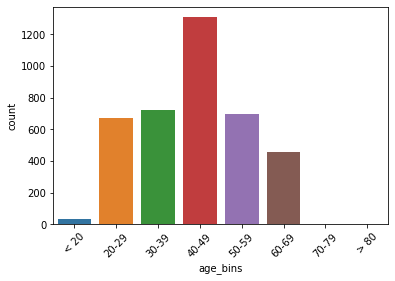

In [54]:
sns.countplot(customer_demographic['age_bins'])
plt.xticks(rotation=45)
plt.show()

### Customer address dataset

In [55]:
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


#### Parsing columns

In [56]:
customer_address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [57]:
customer_address['state'].replace({'New South Wales':'NSW',
                                   'Victoria':'VIC'}, inplace=True)

In [58]:
customer_address['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

## Save the cleaned datasets

In [59]:
transactions.to_csv("../Data/transactions.csv", index=False)
customer_address.to_csv("../Data/customer_address.csv", index=False)
customer_demographic.to_csv("../Data/customer_demographic.csv", index=False)